In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
#Understanding the dataset

In [7]:
df.shape

(51717, 17)

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [13]:
#Data cleaning

In [15]:
df.drop(['address','url','phone','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [19]:
def tranform_ratings(rating):
    if rating in ('NEW','-'):
        return np.nan
    else:
        rating = str(rating).split('/')[0].strip()
        return float(rating)
    
df['rate'] = df['rate'].apply(tranform_ratings)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [23]:
len(df['location'].value_counts())

93

In [25]:
len(df['listed_in(city)'].value_counts())

30

In [27]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [29]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [31]:
df.drop(['location'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [33]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [35]:
df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [37]:
df.rename({
    'approx_cost(for two people)':'cost_for_two',
    'listed_in(type)':'cuisine_type',
    'listed_in(city)':'location',
    'rate':'ratings'
},axis=1,inplace=True)
df.head()

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [39]:
df.shape

(51717, 10)

In [41]:
df.drop_duplicates(inplace=True)
df.shape

(51593, 10)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51593 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51593 non-null  object 
 1   online_order  51593 non-null  object 
 2   book_table    51593 non-null  object 
 3   ratings       41590 non-null  float64
 4   votes         51593 non-null  int64  
 5   rest_type     51366 non-null  object 
 6   cuisines      51548 non-null  object 
 7   cost_for_two  51249 non-null  object 
 8   cuisine_type  51593 non-null  object 
 9   location      51593 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [45]:
df.head()

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [47]:
df[df['name'].str.len()<=1]

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location


In [49]:
df['online_order'].value_counts()

online_order
Yes    30347
No     21246
Name: count, dtype: int64

In [51]:
df['book_table'].value_counts()

book_table
No     45177
Yes     6416
Name: count, dtype: int64

In [53]:
df['ratings'].value_counts()

ratings
3.9    3967
3.8    3870
3.7    3814
3.6    3311
4.0    3180
4.1    2942
3.5    2781
3.4    2472
3.3    2305
4.2    2179
3.2    1867
4.3    1686
3.1    1561
4.4    1137
3.0    1022
2.9     801
4.5     653
2.8     600
2.7     307
4.6     299
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64

In [55]:
df['ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [57]:
df['ratings'].value_counts().sort_values()

ratings
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
4.9      55
4.8      66
2.4      70
2.5     101
4.7     167
2.6     260
4.6     299
2.7     307
2.8     600
4.5     653
2.9     801
3.0    1022
4.4    1137
3.1    1561
4.3    1686
3.2    1867
4.2    2179
3.3    2305
3.4    2472
3.5    2781
4.1    2942
4.0    3180
3.6    3311
3.7    3814
3.8    3870
3.9    3967
Name: count, dtype: int64

In [59]:
df['ratings'].isna().sum()

10003

In [61]:
df = df.dropna(subset=['ratings'])
df.shape

(41590, 10)

In [63]:
df['ratings'].isna().sum()

0

In [65]:
df.head()

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [67]:
df['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [69]:
df['votes'].value_counts()

votes
4       1129
6        986
7        871
9        738
11       699
        ... 
663        1
1570       1
1049       1
2005       1
843        1
Name: count, Length: 2325, dtype: int64

In [71]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [73]:
df['rest_type'].isna().sum()

149

In [75]:
df = df.dropna(subset=['rest_type'])
df['rest_type'].isna().sum()

0

In [77]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [79]:
df['cuisines'].isna().sum()

11

In [81]:
df = df.dropna(subset=['cuisines'])
df['cuisines'].isna().sum()

0

In [83]:
df.head()

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [85]:
df['cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800', nan,
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [87]:
def tranform_cost_for_two(cost):
    cost = str(cost).replace(',','')
    return float(cost)

df['cost_for_two'] = df['cost_for_two'].apply(tranform_cost_for_two)
df['cost_for_two'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800.,   nan, 1900.,  180.,
        330., 2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250.,
       3500., 4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000.,
       1050., 2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,
         80.])

In [89]:
df['cost_for_two'].isna().sum()

240

In [91]:
df = df.dropna(subset=['cost_for_two'])
df.shape

(41190, 10)

In [93]:
df['cost_for_two'].isna().sum()

0

In [95]:
df.head()

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [97]:
df['cuisine_type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [99]:
df['location'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [101]:
#Grouping of low count values

In [103]:
df['rest_type'].value_counts().sort_values()

rest_type
Quick Bites, Kiosk                1
Bakery, Beverage Shop             1
Dessert Parlor, Food Court        2
Cafe, Food Court                  2
Dessert Parlor, Kiosk             2
                              ...  
Delivery                       1666
Dessert Parlor                 1848
Cafe                           3365
Casual Dining                  9597
Quick Bites                   13861
Name: count, Length: 87, dtype: int64

In [105]:
rest_type_counts = df['rest_type'].value_counts()
rest_type_counts

rest_type
Quick Bites                   13861
Casual Dining                  9597
Cafe                           3365
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

In [107]:
rest_type_counts = rest_type_counts[rest_type_counts<1000]
rest_type_counts

rest_type
Bakery                        704
Bar                           640
Beverage Shop                 638
Food Court                    496
Bar, Casual Dining            381
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Bakery, Beverage Shop           1
Quick Bites, Kiosk              1
Name: count, Length: 80, dtype: int64

In [109]:
rest_type_counts.sum()

8490

In [111]:
df['rest_type'] = df['rest_type'].apply(lambda x: 'Others' if x in rest_type_counts else x)
df['rest_type'].value_counts()

rest_type
Quick Bites           13861
Casual Dining          9597
Others                 8490
Cafe                   3365
Dessert Parlor         1848
Delivery               1666
Takeaway, Delivery     1276
Casual Dining, Bar     1087
Name: count, dtype: int64

In [113]:
df.head()

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Others,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [117]:
df['cuisines'].value_counts().sort_values()

cuisines
North Indian, Chinese, Arabian, Momos            1
BBQ, Rolls                                       1
Fast Food, Italian, North Indian, Steak          1
Continental, Italian, Mediterranean, Salad       1
Fast Food, Street Food, Beverages, Chinese       1
                                              ... 
Bakery, Desserts                               613
Cafe                                           620
South Indian                                  1231
North Indian, Chinese                         1949
North Indian                                  2107
Name: count, Length: 2367, dtype: int64

In [119]:
cuisine_counts = df['cuisines'].value_counts()
cuisine_counts = cuisine_counts[cuisine_counts<100]
cuisine_counts

cuisines
Kerala, South Indian                        94
North Indian, Mughlai, Chinese              89
Biryani, South Indian                       89
Cafe, Continental, Beverages                87
Andhra, Biryani, North Indian, Chinese      86
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: count, Length: 2306, dtype: int64

In [121]:
df['cuisines'] = df['cuisines'].apply(lambda x: 'Others' if x in cuisine_counts else x)
df['cuisines'].value_counts()

cuisines
Others                                23103
North Indian                           2107
North Indian, Chinese                  1949
South Indian                           1231
Cafe                                    620
                                      ...  
Chinese, Thai, Momos                    110
North Indian, Chinese, Continental      105
Andhra, Biryani                         104
Italian, Pizza                          101
Cafe, Bakery                            100
Name: count, Length: 62, dtype: int64

In [123]:
df.head()

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,Others,800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,Others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Others,Others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,Others,600.0,Buffet,Banashankari


In [125]:
cuisine_type_counts = df['cuisine_type'].value_counts().sort_values()
cuisine_type_counts

cuisine_type
Pubs and bars           630
Buffet                  846
Drinks & nightlife     1038
Cafes                  1511
Desserts               2709
Dine-out              14050
Delivery              20406
Name: count, dtype: int64

In [127]:
location_counts = df['location'].value_counts().sort_values()
location_counts

location
New BEL Road              569
Banashankari              727
Electronic City           818
Rajajinagar               872
Malleshwaram              946
Bellandur                 952
Frazer Town               953
Kalyan Nagar              989
Kammanahalli             1017
Sarjapur Road            1017
Basavanagudi             1072
Brookefield              1139
Old Airport Road         1171
Whitefield               1201
Bannerghatta Road        1207
Marathahalli             1292
HSR                      1329
Residency Road           1344
Lavelle Road             1449
Brigade Road             1482
Church Street            1495
MG Road                  1509
Indiranagar              1536
JP Nagar                 1632
Jayanagar                1914
Koramangala 6th Block    2120
Koramangala 5th Block    2247
Koramangala 4th Block    2253
Koramangala 7th Block    2360
BTM                      2578
Name: count, dtype: int64

In [129]:
location_counts = df['location'].value_counts()
location_counts = location_counts[location_counts<1000]
location_counts.sum()

6826

In [131]:
df['location'] = df['location'].apply(lambda x: 'Others' if x in location_counts else x)
df['location'].value_counts()

location
Others                   6826
BTM                      2578
Koramangala 7th Block    2360
Koramangala 4th Block    2253
Koramangala 5th Block    2247
Koramangala 6th Block    2120
Jayanagar                1914
JP Nagar                 1632
Indiranagar              1536
MG Road                  1509
Church Street            1495
Brigade Road             1482
Lavelle Road             1449
Residency Road           1344
HSR                      1329
Marathahalli             1292
Bannerghatta Road        1207
Whitefield               1201
Old Airport Road         1171
Brookefield              1139
Basavanagudi             1072
Sarjapur Road            1017
Kammanahalli             1017
Name: count, dtype: int64

In [133]:
df.head()

,name,online_order,book_table,ratings,votes,rest_type,cuisines,cost_for_two,cuisine_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,Others,800.0,Buffet,Others
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,Others,800.0,Buffet,Others
2,San Churro Cafe,Yes,No,3.8,918,Others,Others,800.0,Buffet,Others
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Others
4,Grand Village,No,No,3.8,166,Casual Dining,Others,600.0,Buffet,Others


In [135]:
#Q1 - Type of restaurant most preferred by the customers?

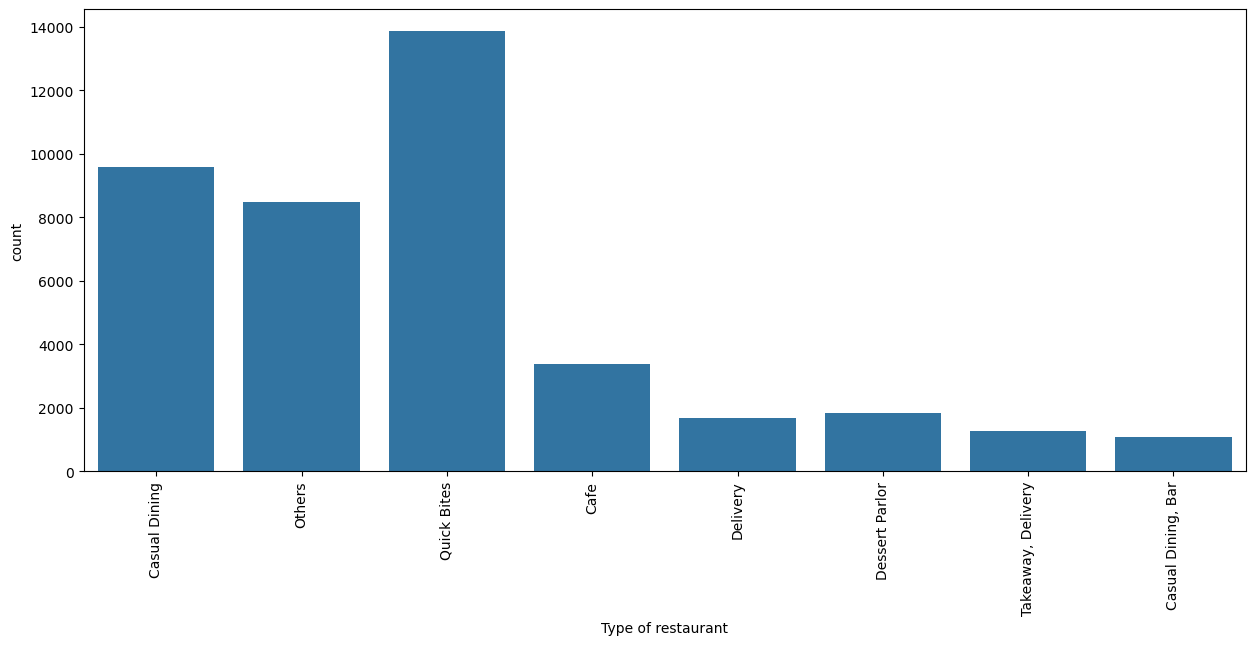

In [139]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['rest_type'])
plt.xlabel("Type of restaurant")
plt.xticks(rotation=90)
plt.show()

In [153]:
#Q2 - Finding the performance of different restaurant types based on votes from the customers.

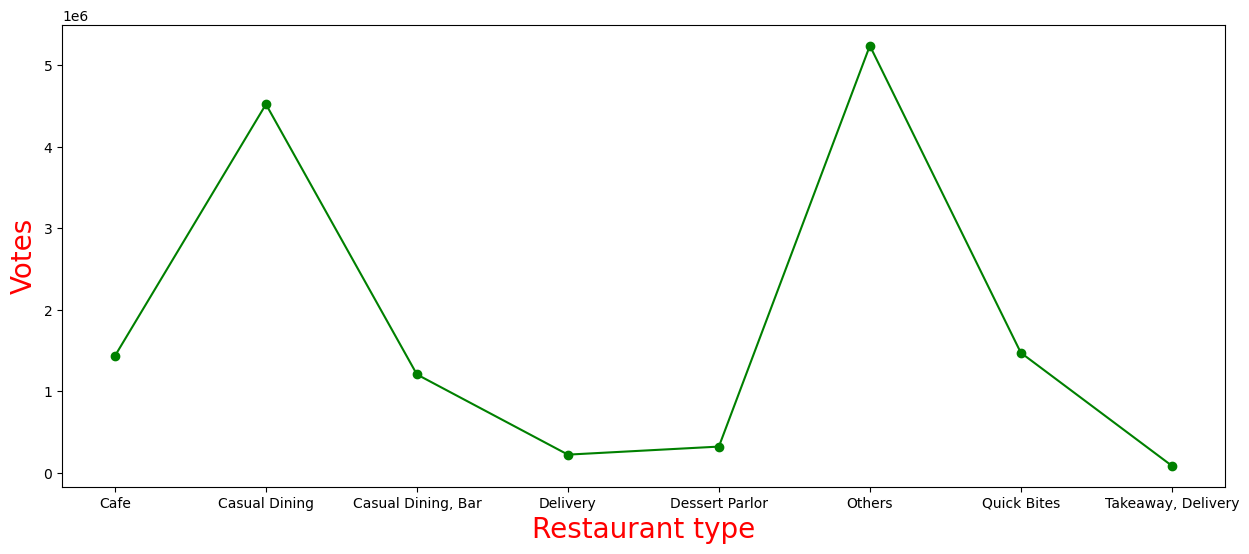

In [158]:
grouped_data = df.groupby('rest_type')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.figure(figsize=(15,6))
plt.plot(result,c="green",marker="o")
plt.xlabel("Restaurant type", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.show()

In [160]:
#Q3- What is the average cost for two at restaurants in Bangalore?

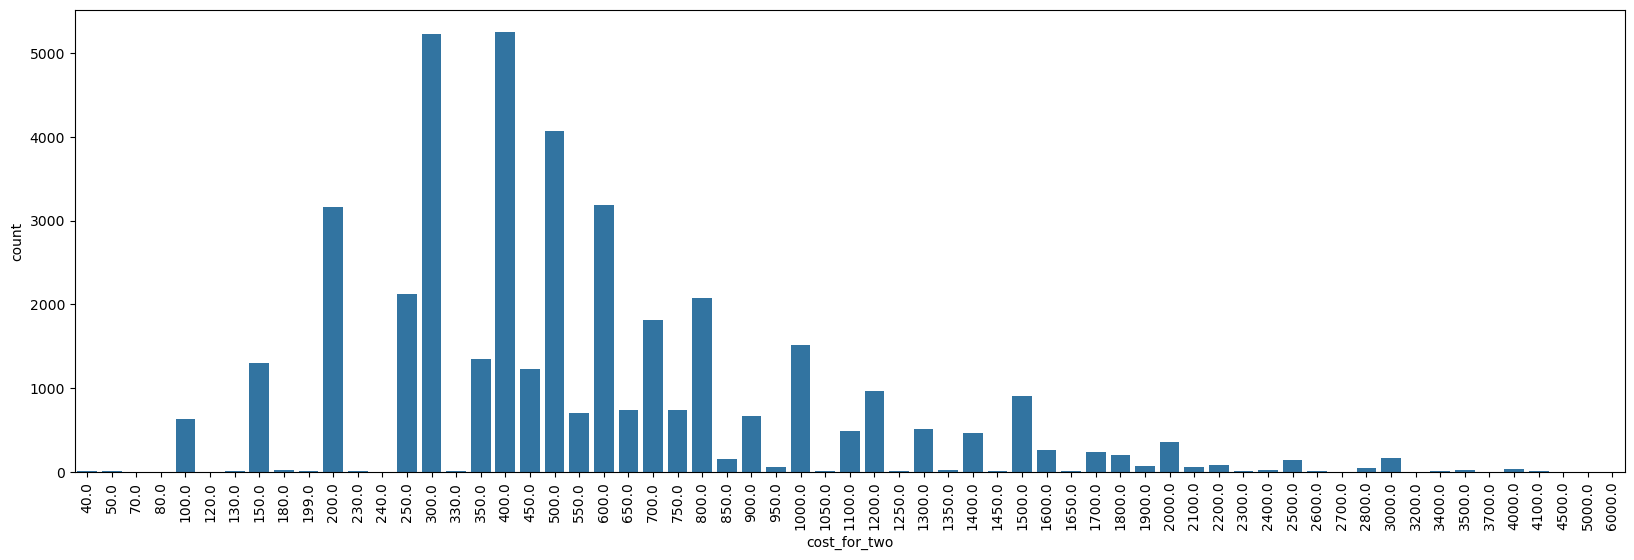

In [172]:
average_cost = df['cost_for_two']
plt.figure(figsize=(20,6))
sns.countplot(x=average_cost)
plt.xticks(rotation=90)
plt.show()

In [174]:
#Q4 - Between online and offline restaurants which receive the higher ratings?

<Axes: xlabel='online_order', ylabel='ratings'>

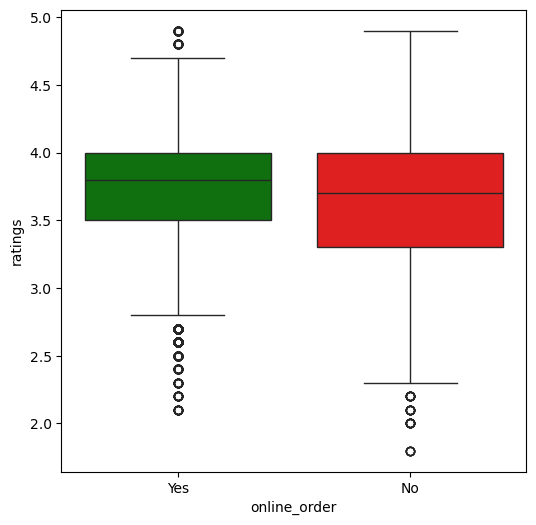

In [184]:
plt.figure(figsize = (6,6))
palette_colors = {"Yes": "green", "No": "red"}
sns.boxplot(x='online_order', y='ratings', data=df, hue='online_order', palette=palette_colors, legend=False)

In [186]:
#Q5 - Comparing amount of orders for different restaurants through both online and offline mode.

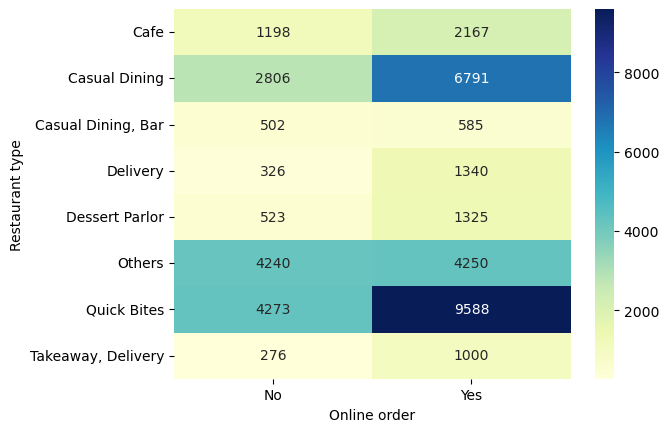

In [204]:
pivot_table = df.pivot_table(index = 'rest_type', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Online order")
plt.ylabel("Restaurant type")
plt.show()

In [206]:
#Q6 - Finding the area wise restaurant density in Bangalore.

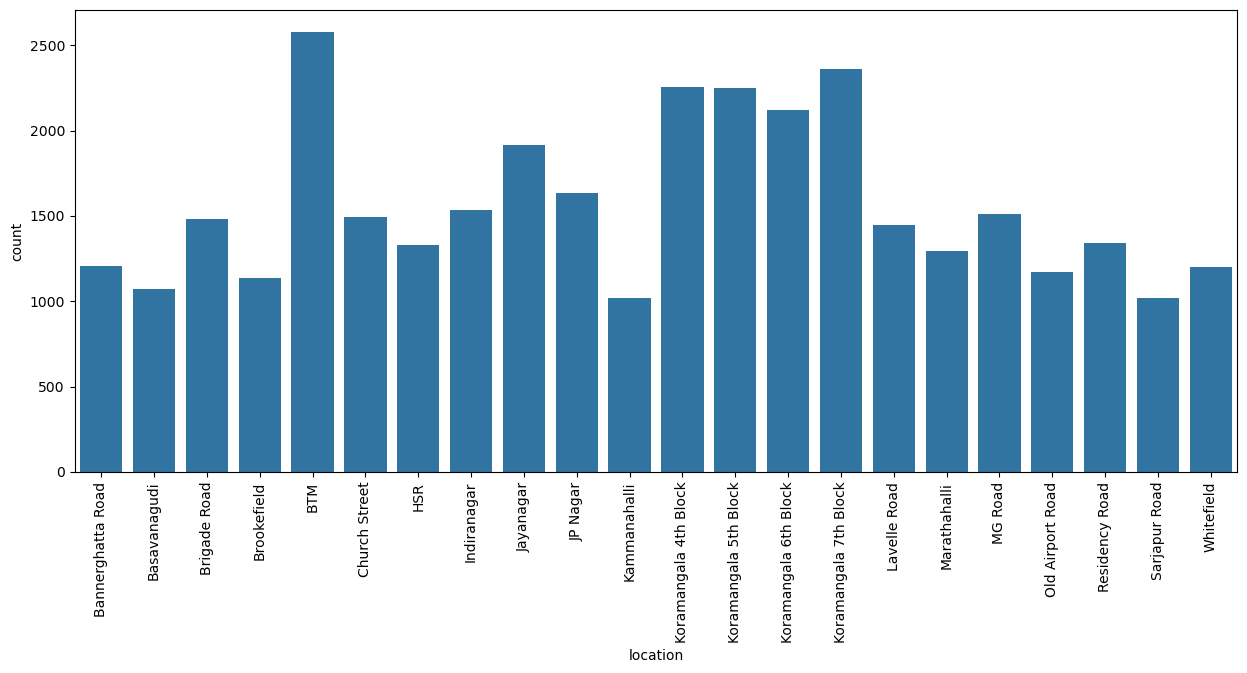

In [208]:
plt.figure(figsize=(15,6))
sns.countplot(data=df[df['location']!='Others'], x='location')
plt.xticks(rotation=90)
plt.show()

In [224]:
#Q7 - Finding the top 10 most common cuisines among restaurants in Bangalore.

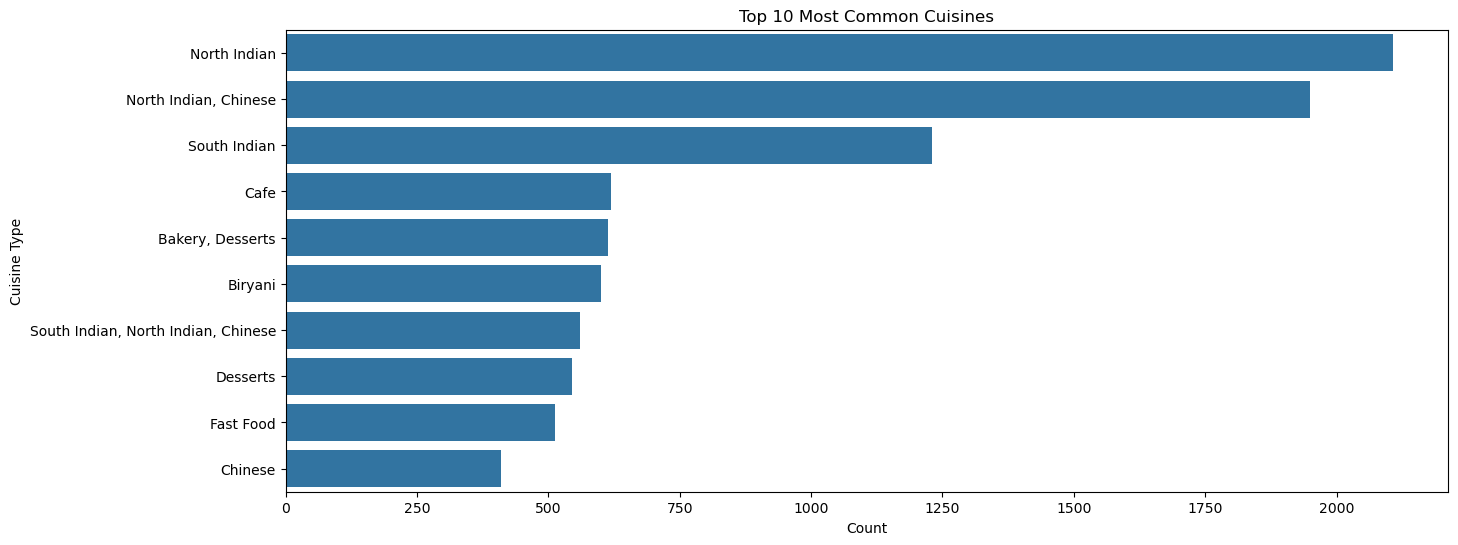

In [226]:
plt.figure(figsize=(15, 6))

# Exclude "Others" and get the top 10 cuisines
top_10_cuisines = df[df['cuisines'] != 'Others']['cuisines'].value_counts().nlargest(10).index

# Filter dataset for only top 10 cuisines (excluding "Others")
filtered_df = df[df['cuisines'].isin(top_10_cuisines)]

# Plot with cuisines on Y-axis and count on X-axis
sns.countplot(data=filtered_df, y='cuisines', order=top_10_cuisines)

plt.xlabel("Count")  # X-axis label
plt.ylabel("Cuisine Type")  # Y-axis label
plt.title("Top 10 Most Common Cuisines")  # Title
plt.show()

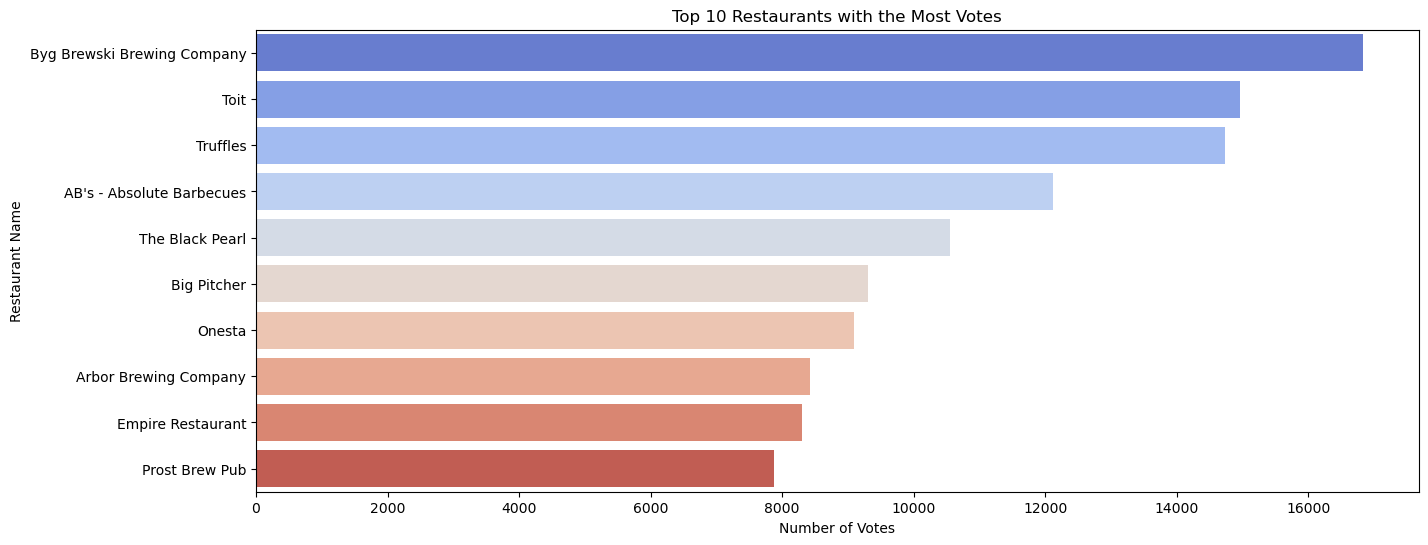

In [240]:
# Ensure there are no missing values in 'votes'
df_clean = df[df['votes'].notna()]

# Get the top 10 restaurants (excluding duplicates)
top_10_restaurants = df_clean.sort_values(by='votes', ascending=False).drop_duplicates(subset=['name']).head(10)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(data=top_10_restaurants, x='votes', y='name', hue='name', palette='coolwarm', legend=False)

# Labels and Title
plt.xlabel("Number of Votes")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Restaurants with the Most Votes")
plt.show()